In [ ]:
#Import Library

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV3Large


In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Define directories
train_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Train'
validation_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Val'
test_dir = '/content/drive/My Drive/Colab_Notebooks/Strawbbery_Disease/Strawberry/Test'

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 1. Load and preprocess the Strawberry dataset
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_generator = datagen.flow_from_directory(
    test_dir ,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 3663 images belonging to 2 classes.
Found 819 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large


# Load MobileNetV3 for feature extraction
MobileNetV3_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
MobileNetV3_model.trainable = False

# 3. Extract features
def extract_features(generator, model):
    features = model.predict(generator)
    features_flat = features.reshape(features.shape[0], -1)
    return features_flat

train_features = extract_features(train_generator, MobileNetV3_model)
validation_features = extract_features(validation_generator, MobileNetV3_model)
test_features = extract_features(test_generator, MobileNetV3_model)

# Get labels
train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes




12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 856s 7s/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 171s 7s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


**Support Vector Machine**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       410
           1       0.97      0.96      0.96       409

    accuracy                           0.96       819
   macro avg       0.96      0.96      0.96       819
weighted avg       0.96      0.96      0.96       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.95      0.93      0.94        45

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.95        91
weighted avg       0.95      0.95      0.95        91

Confusion Matrix (Test):
[[44  2]
 [ 3 42]]


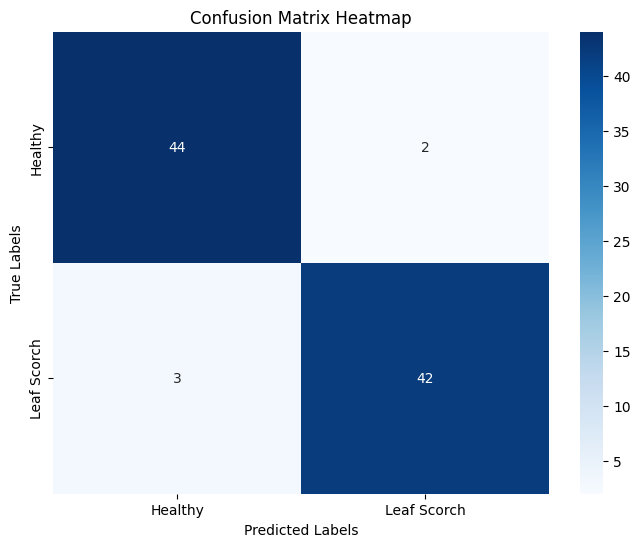

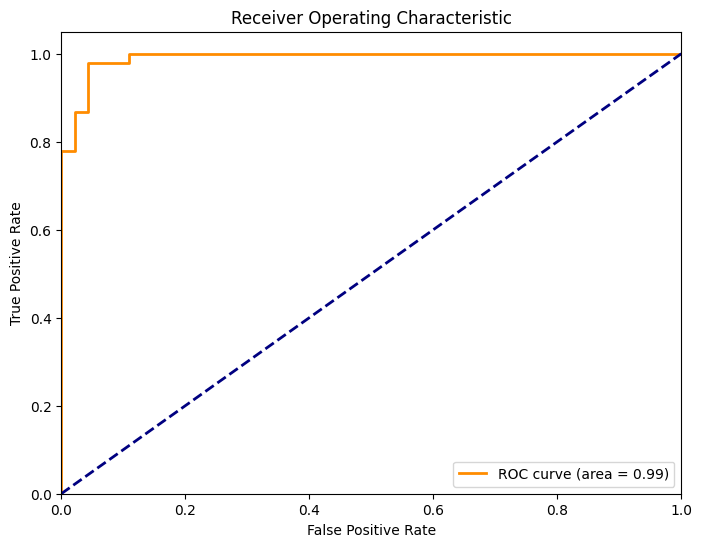

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train a classification algorithm
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)


#  Evaluate the model
validation_predictions = svm_classifier.predict(validation_features)
test_predictions = svm_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, svm_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Decision Tree Classifier**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       410
           1       0.79      0.75      0.77       409

    accuracy                           0.77       819
   macro avg       0.77      0.77      0.77       819
weighted avg       0.77      0.77      0.77       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        46
           1       0.72      0.69      0.70        45

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91

Confusion Matrix (Test):
[[34 12]
 [14 31]]


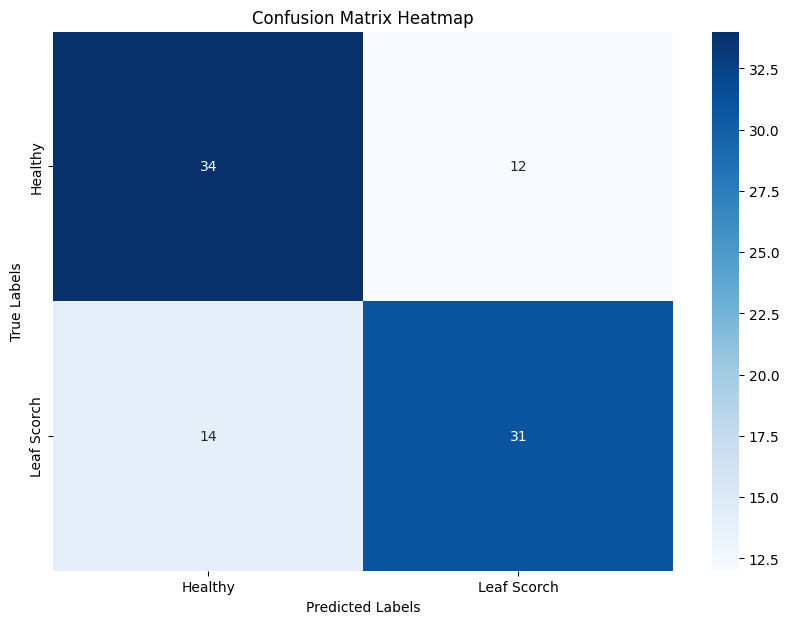

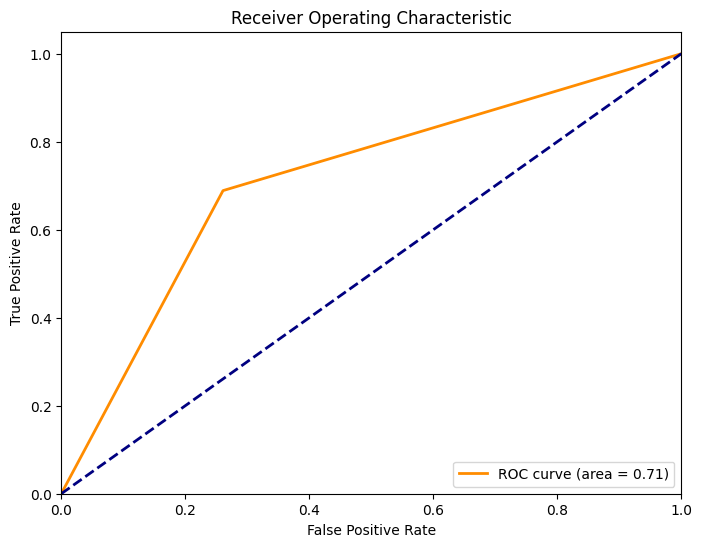

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, train_labels)

# Evaluate the model
validation_predictions = dt_classifier.predict(validation_features)
test_predictions = dt_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, dt_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       410
           1       0.90      0.94      0.92       409

    accuracy                           0.92       819
   macro avg       0.92      0.92      0.92       819
weighted avg       0.92      0.92      0.92       819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        46
           1       0.93      0.84      0.88        45

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

Confusion Matrix (Test):
[[43  3]
 [ 7 38]]


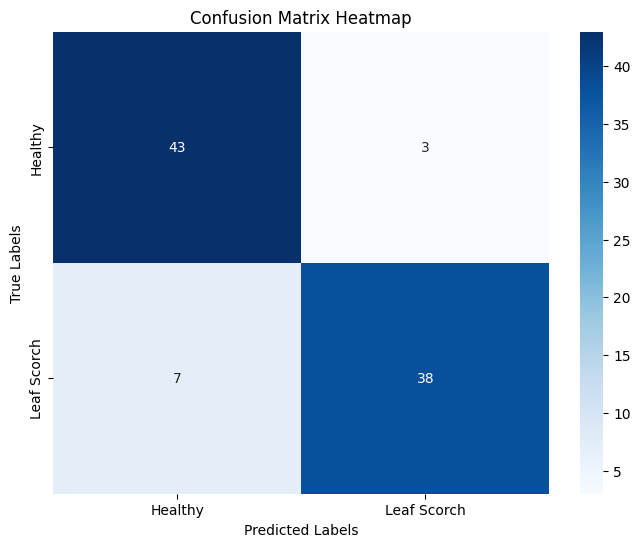

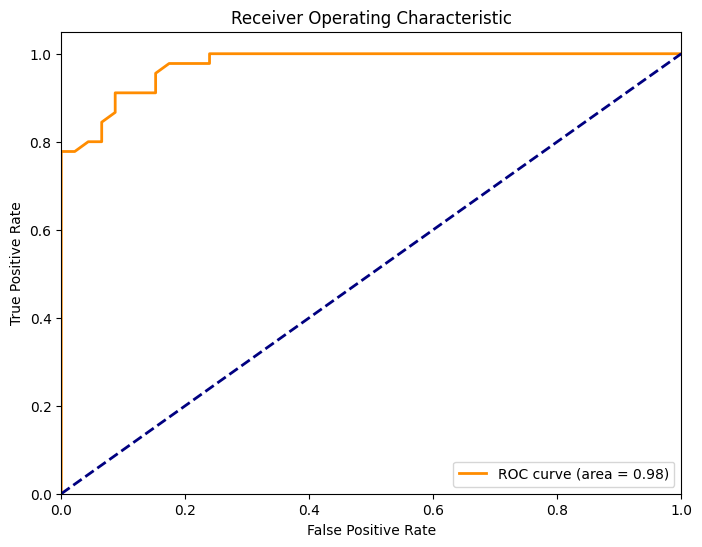

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, auc
import numpy as np

#  Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

#  Evaluate the model
validation_predictions = rf_classifier.predict(validation_features)
test_predictions = rf_classifier.predict(test_features)

print("Classification Report (Validation):")
print(classification_report(validation_labels, validation_predictions))

print("Classification Report (Test):")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm=confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix (Test):")
print(cm)


# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, rf_classifier.predict_proba(test_features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()